<a href="https://colab.research.google.com/github/ShubhadaSaley/The-Sparks-Foundation/blob/main/Prediction_Using_SupervisedML_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Sparks Fondations Graduate Rotational Internship Program (GRIP SEPT 2022)
Data Science and Business Analytics Internship

**Task 1: Prediction Using Supervised ML - Simple Linear Regression**


*   The problem of the statement is what will be predicted score if student studies for 9.25 hrs/day?
*   Pandas, Numpy for Data Manupulation.


*   Matplotlib, Seaborn for Data Visualization
*   sklearn for modeling


**Author: Shubhada Saley**

# Step 1: Reading and Understanding Data

In [ ]:
#supress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Reading data from given url
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported sucessfully.")

df.head(10)

Data imported sucessfully.


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
#Inspects various aspects of our dataframe
print("Rows: ", df.shape[0])
print("Columns: ", df.shape[1])

Rows:  25
Columns:  2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Step 2: Exploratory Data Analysis

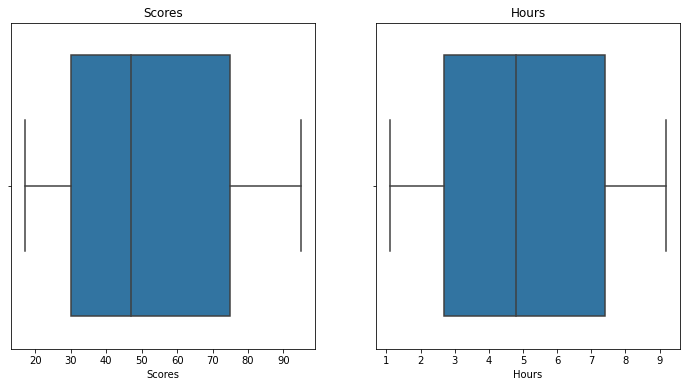

In [ ]:
#To check for outliers

fig = plt.figure(figsize=(12,6))

#putting ylim same for better visibility

ax1 = fig.add_subplot(1, 2, 1, title="Scores")
ax2 = fig.add_subplot(1, 2, 2, title="Hours")

sns.boxplot(df.Scores, ax=ax1)
sns.boxplot(df.Hours, ax=ax2)

plt.show()




No outlier found to be treated henceforth

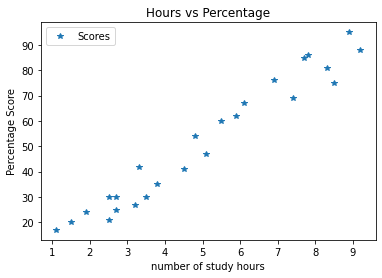

In [ ]:
#Plotting the distribuition of scores
df.plot(x='Hours', y='Scores', style='*' )
plt.title('Hours vs Percentage')
plt.xlabel('number of study hours')
plt.ylabel('Percentage Score')
plt.show()

From the above graph, we can infer that there is positive linear relation between number of study hours and Percentage Score

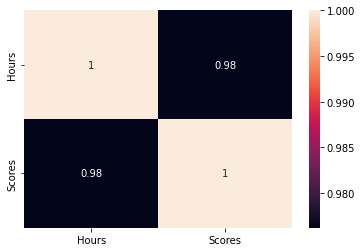

In [ ]:
# To check correlation

sns.heatmap(df.corr(), annot=True)
plt.show()

Hours and Scores are highly Positively correlated to each other

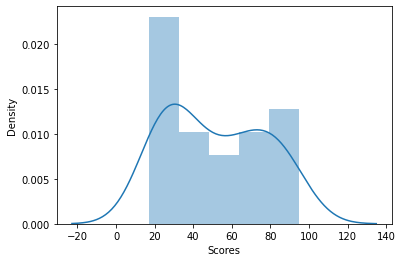

In [ ]:
# To check for distribution of Scores in dataset

sns.distplot(df['Scores'], bins=5)
plt.show()

Almost normally distributed with skew in the positive side. Hence now we can perform Linear Regression to predict the values

# Step 3: Performing Simple Linear Regression

**Steps in the model building**


*   First assign the feature variable, Hours to the variable x, and the response variable Scores to the variable y.
*   To divide data into "attributes" (inputs) and "labels" (outputs)


In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, :1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [95]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15) 

# Now lets look at train and test dataset individually

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(20, 1)
(20, 1)
(5, 1)
(5, 1)


# Step 4: Training Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

print("Training is complete")


Training is complete


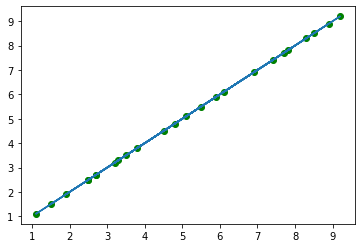

In [96]:
# Plotting the regression line

line = lr.coef_*X+lr.intercept_

# Plotting for the test data

plt.scatter(X, y, c = 'g')
plt.plot(X, line);
plt.show()


# Checking Accuracy Scores for both training as well as testing sets

In [ ]:
print("Training Score: ", lr.score(X_train, y_train)*100)
print("Testing Score: ", lr.score(X_test, y_test)*100)


Training Score:  100.0
Testing Score:  100.0


# Step 5: Predictions on the Test set



In [74]:
print("X_test:", X_test) # testing data - in hours
y_pred = lr.predict(X_test) # Predicting the scores
print("y_pred:", y_pred)

X_test: [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
y_pred: [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [92]:
# Comparing Actual data vs Predicted data
#printing Actual data and Predicted data differently
data = {
    "Actual_Data":[y_test]}
df2 = pd.DataFrame(data)
print(df2)





                           Actual_Data
0  [[1.5], [3.2], [7.4], [2.5], [5.9]]


In [93]:
data2 = {
    "Predicted_Data":[y_pred]}

df3 = pd.DataFrame(data2)
print(df3)

                                      Predicted_Data
0  [[1.4999999999999996], [3.2], [7.4000000000000...


What will be predicted score if a student study for 9.25 hrs in a day?

In [94]:
hours = 9.25
own_pred = lr.predict([[hours]])
print("No of study Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of study Hours = 9.25
Predicted Score = [9.25]


# Final Step 6: Evaluating the model
The final step is to evaluate the performance of algorithm. This step is quite important to compare how well different algorithms perform on a particular dataset. we have chosen the mean square error. Also, there are many such metrics which we can choose.

In [97]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 2.34


# Conclusion
After Analysing the dataset we got Predicted score around 100 based on the number of study hours i.e., 9.25 hrs/day.